In [1]:
from bs4 import BeautifulSoup

import requests
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# import seaborn as sns





In [2]:
# x=14
# y=26
position = [
    [0, 0, 0, 0, 0, 0, "철원", "화천", "양구", "고성", 0, 0, 0, 0],
    [0, 0, 0, 0, 0, "서울 도봉", "서울 노원", "연천", "포천", "속초", 0, 0, 0, 0],
    [0, 0, 0,"파주", "고양", "서울강북", "동두천", "양주", "인제", "양양", 0, 0, 0, 0],
    [0, "인천 강화", "김포", "광명", "서울 은평", "서울 서대문", "서울 종로", "의정부", "남양주", "가평", "춘천", 0, 0, 0],
    [0, "인천 서구", "부천", "안양", "서울 강서", "서울 마포", "서울 중구", "서울 동대문", "서울 중랑", "구리", "홍천", "강릉", 0, 0,],
    [0, "인천 동구", "인천 계양", "시흥", "서울 양천", "서울 동작", "서울 용산", "서울 성동", "서울 강동", "하남","횡성", "동해", 0, 0,],
    [0, 0, "인천 부평", "안산", "서울 영등포", "서울 관악", "서울 서초", "서울 광진", "서울 송파", "양평", "평창", "정선", 0, "울릉"],
    [0, "인천 중구", "인천 남구", "화성", "서울 구로", "서울 금천", "서울 강남", "과천", "광주", "여주", "원주", "태백", 0, 0],
    ["인천 웅진", "인천 연수", "인천 남동", "오산", "안성", "군포", "의왕", "성남", "이천", "문경", "영월", "삼척", 0, 0],
    [0, "태안", "당진", "아산", "천안", "평택", "수원", "용인", "상주", "예천", "영주", "봉화", "울진", 0],
    [0, "서산", "홍성", "예산", "공주", "음성", "충주", "단양", "제천", "구미", "안동", "영양", "영덕", 0],
    [0, 0, "보령", "청양", "세종", "진천", "증평", "괴산", "김천", "군위", "의성", "청송", "포항", 0],
    [0, 0, "부여", "논산", "계룡", "대전 대덕", "청주", "보은", "성주", "칠곡", "영천", "경산", "경주", 0],
    [0, 0, "서천", "금산", "대전 유성", "대전 동구", "옥천", "고령", "청도", "대구 북구", "대구 중구", "대구 동구", "울산 북구", 0],
    [0, 0, "군산", "익산", "대전 서구", "대전 중구", "영동", "합천", "대구 서구", "대구 남구", "대구 수성", "울산 중구", "울산 동구", 0],
    [0, 0, "부안", "김제", "완주", "무주", "거창", "창녕", "대구 달서", "대구 달성", "부산 금정", "울산 중구", "울산 남구", 0],
    [0, "고창", "정읍", "전주", "진안", "장수", "함양", "의령", "밀양", "부산 북구", "부산 부산진", "부산 동래", "부산 기장", 0],
    [0, "영광", "장성", "순창", "임실", "남원", "진주", "함안", "양산", "부산 시상", "부산 동구", "부산 연제", "부산 해운대", 0],
    [0, "함평", "담양", "곡성", "구례", "산청", "사천", "창원", "부산 강서", "부산 서구", "부산 중구", "부산 수영", 0, 0],
    ["신안", "무안", "광주 광산", "광주 북구", "화순", "하동", "남해", "고성", "김해", "부산 사하", "부산 영도", "부산 남구", 0, 0],
    ["목포", "나주", "광주 서구", "광주 동구", "순천", "광양", 0, 0, "통영", "거제", 0, 0, 0, 0],
    ["해남", "영암", "광주 남구", "보성", "여수", 0, 0, 0, 0, 0, 0, 0, 0, 0],
    ["진도", "강진", "장흥", "고흥", 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, "완도", 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, "제주", 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, "서귀포", 0, 0, 0, 0, 0, 0, 0, 0, 0],
   ]

In [54]:
region = (
    "서울특별시",
    "부산광역시",
    "대구광역시",
    "인천광역시",
    "광주광역시",
    "대전광역시",
    "울산광역시",
#     "세종특별자치시",
    "경기도",
    "강원도",
    "충청북도",
    "충청남도",
    "전라북도",
    "전라남도",
    "경상북도",
    "경상남도",
    "제주특별자치도",
)

wiki_addr = "https://ko.wikipedia.org/wiki/{addr}"

In [26]:
a=requests.get("https://ko.wikipedia.org/wiki/%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C")

In [28]:
b=BeautifulSoup(a.text,"lxml")

In [50]:
t=b.findAll("table", {"class":["wikitable", "sortable", "jquery-tablesorter"]})


In [58]:
a=pd.read_excel("../대한민국_시군구_인구_면적.xlsx")

In [61]:
a[:3]

,시,구,한자,Population,area,세대
0,서울특별시,종로구,鍾路區,162957,23.91,72582.0
1,서울특별시,중구,中區,134463,9.96,59591.0
2,서울특별시,용산구,龍山區,246317,21.87,107026.0


In [68]:
# a.sort_values("세대", ascending=False)

In [111]:
# pd.DataFrame(position)
for y in range(len(position)):
    for x in range(len(position[y])):
        if isinstance(position[y][x], str):
            position[y][x] = position[y][x].replace(" ","")
        else:
            position[y][x] = np.nan
            

        

In [113]:
p=pd.DataFrame(position)

In [115]:
p.to_excel("./position.xlsx")

In [2]:
a = pd.read_excel("../position.xlsx")

In [18]:
b=pd.DataFrame(np.random.rand(24,16))

b

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.784427,0.296070,0.387373,0.455148,0.558566,0.569310,0.273557,0.287473,0.327501,0.666817,0.604579,0.951945,0.420169,0.976441,0.726733,0.203057
1,0.644614,0.589787,0.978270,0.275636,0.758500,0.667570,0.934226,0.050609,0.351238,0.242075,0.745299,0.641365,0.882591,0.774580,0.080578,0.885499
2,0.603110,0.005891,0.408428,0.998714,0.845830,0.455699,0.245415,0.108154,0.395057,0.639083,0.803079,0.895306,0.555097,0.817171,0.699726,0.096908
3,0.994862,0.026463,0.288569,0.121826,0.238997,0.994689,0.029237,0.808126,0.275882,0.042192,0.149333,0.159945,0.531199,0.143787,0.685985,0.758150
4,0.873122,0.449217,0.689033,0.416350,0.716973,0.815014,0.560538,0.422054,0.075458,0.822425,0.987477,0.426556,0.439055,0.225951,0.975503,0.630033
5,0.210379,0.766289,0.497768,0.334516,0.882282,0.522427,0.070879,0.737639,0.639085,0.362846,0.785743,0.616250,0.061043,0.648088,0.408797,0.328557
6,0.325837,0.229869,0.385103,0.383429,0.776760,0.638565,0.994286,0.521889,0.433983,0.352081,0.348664,0.885146,0.324941,0.078363,0.573176,0.918180
7,0.333382,0.961245,0.583403,0.228574,0.991867,0.749656,0.908851,0.376950,0.185644,0.427769,0.940393,0.524814,0.533012,0.003585,0.974583,0.021034
8,0.695084,0.973725,0.380715,0.205880,0.057261,0.908015,0.860771,0.847808,0.188073,0.140387,0.357519,0.495918,0.859972,0.725421,0.359861,0.433273
9,0.158115,0.554650,0.673050,0.665119,0.232012,0.649051,0.577207,0.542496,0.363920,0.387157,0.572426,0.094208,0.007744,0.057474,0.761638,0.071057


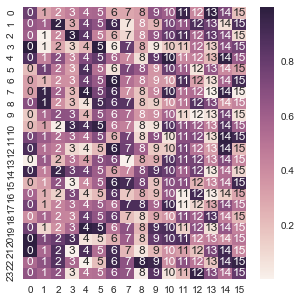

In [28]:
plt.figure(figsize=[5,5])
sns.heatmap(b,annot=t)
plt.show()

In [29]:
t=np.array([[x for x in range(16)] for y in range(24)])
# t

In [30]:
a

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,서울도봉,서울노원,연천,포천,속초,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,파주,고양,서울강북,서울성북,동두천,양주,인제,양양,NaN,NaN,NaN
3,NaN,인천강화,김포,광명,서울은평,서울서대문,서울종로,의정부,남양주,가평,춘천,NaN,NaN,NaN
4,NaN,인천서구,부천,안양,서울강서,서울마포,서울중구,서울동대문,서울중랑,구리,홍천,강릉,NaN,NaN
5,NaN,인천동구,인천계양,시흥,서울양천,서울동작,서울용산,서울성동,서울강동,하남,횡성,동해,NaN,NaN
6,NaN,NaN,인천부평,안산,서울영등포,서울관악,서울서초,서울광진,서울송파,양평,평창,정선,NaN,울릉
7,NaN,인천중구,인천남구,화성,서울구로,서울금천,서울강남,과천,광주,여주,원주,태백,NaN,NaN
8,인천옹진,인천연수,인천남동,오산,안성,군포,의왕,성남,이천,문경,영월,삼척,NaN,NaN
9,NaN,태안,당진,아산,천안,평택,수원,용인,상주,예천,영주,봉화,울진,NaN


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors

def draw_blockcolormap(tbl, datacol, vmin, vmax, whitelabelmin, cmapname, gamma, datalabel, dataticks):
    cmap = colors.LinearSegmentedColormap(cmapname + 'custom', getattr(_cm, '_{}_data'.format(cmapname)), gamma=gamma)
    cmap.set_bad('white', 1.)

    mapdata = tbl.pivot(index='y', columns='x', values=datacol)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)

    plt.figure(figsize=(9, 16))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmap,
               edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in tbl.iterrows():
        annocolor = 'white' if row[datacol] > whitelabelmin else 'black'

        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. (중구, 서구)
        if row['d1'].endswith('시') and not row['d1'].startswith('세종'):
            dispname = '{}\n{}'.format(row['d1'][:2], row['d2'][:-1])
            if len(row['d2']) <= 2:
                dispname += row['d2'][-1]
        else:
            dispname = row['d2'][:-1]

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 12, 1.2
        else:
            fontsize, linespacing = 14, 1.03

        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)

    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()
    plt.gca().set_aspect(1)

    plt.axis('off')
    
    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)
    cb.set_ticks(dataticks)

    plt.tight_layout()

NameError: name '_cm' is not defined

In [30]:
data = {
    "도시": ["서울", "서울", "서울",
           "부산", "부산", "부산",
           "인천", "인천"],
    "연도": ["2015", "2010", "2005",
           "2015", "2010", "2005",
           "2015", "2010"],
    "인구": [9904312, 9631482, 9762546,
           3448737, 3393191, 3512547,
           2890451, 2632035],
    "지역": ["수도권", "수도권", "수도권",
            "경상권", "경상권", "경상권",
            "수도권", "수도권"]
}
columns = ["도시", "연도", "인구", "지역"]
df1 = pd.DataFrame(data, columns=columns)
df1

,도시,연도,인구,지역
0,서울,2015,9904312,수도권
1,서울,2010,9631482,수도권
2,서울,2005,9762546,수도권
3,부산,2015,3448737,경상권
4,부산,2010,3393191,경상권
5,부산,2005,3512547,경상권
6,인천,2015,2890451,수도권
7,인천,2010,2632035,수도권


In [34]:
a=df1.pivot("도시","연도", "인구")

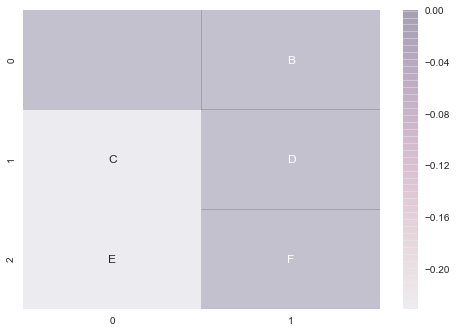

In [51]:
data = np.array([[0.000000,0.000000],[-0.231049,0.000000],[-0.231049,0.000000]])
labels =  np.array([['','B'],['C','D'],['E','F']])
fig, ax = plt.subplots()
ax = sns.heatmap(data, annot = labels, fmt = '', alpha=0.2)
plt.show()

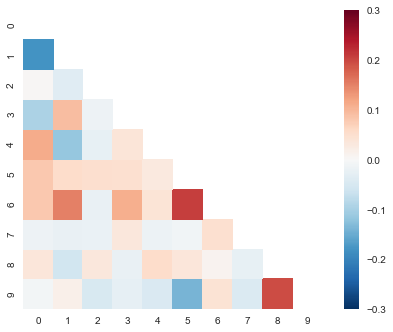

In [59]:
# corr = np.corrcoef(np.random.randn(10, 200))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
     ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)
        
plt.show()

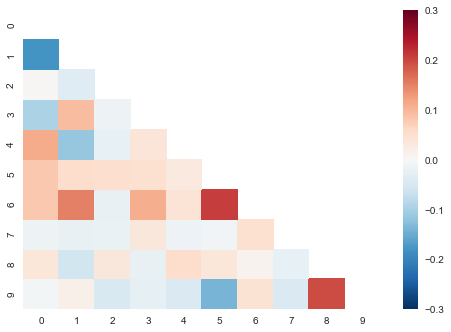

In [58]:
corr = np.corrcoef(np.random.randn(10, 200))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
     ax = sns.heatmap(corr, mask=mask, vmax=.3,)
        
plt.show()

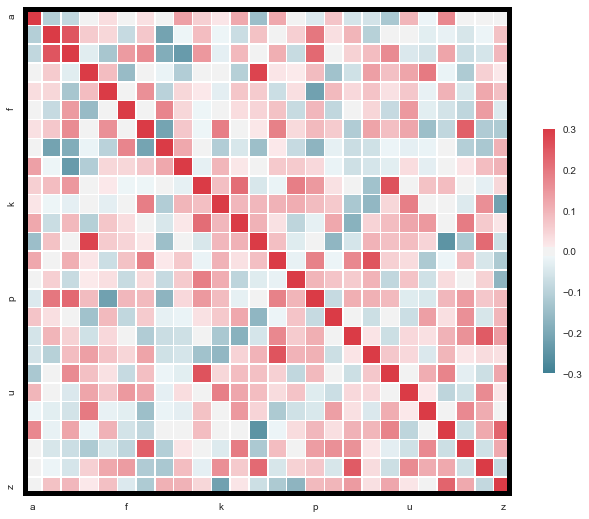

In [64]:
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
letters = string.ascii_letters

rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(letters[:26]))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

ax.axhline(y=0, color='k',linewidth=10)
ax.axhline(y=corr.shape[1], color='k',linewidth=10)
ax.axvline(x=0, color='k',linewidth=10)
ax.axvline(x=corr.shape[0], color='k',linewidth=10)
plt.show()

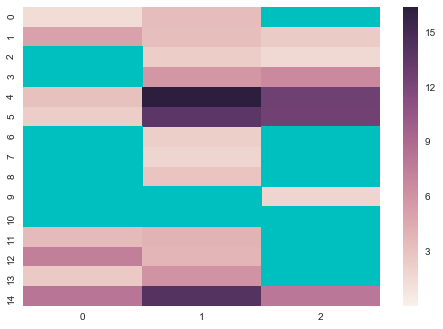

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns; sns.set()
data = np.array([[1.3531363408, 3.339479161, 0.0760855365], [5.1167382617, 3.2890920405, 2.4764601828], [0.0025058257, 2.3165128345, 1.6532714962], [0.2600549869, 5.8427407219, 6.6627226609], [3.0828581725, 16.3825494439, 12.6722666929], [2.3386307357, 13.7275065772, 12.5760972276], [1.224683813, 2.2213656372, 0.6300876451], [0.4163788387, 1.8128374089, 0.0013106046], [0.0277592882, 2.9286203949, 0.810978992], [0.0086613622, 0.6181261247, 1.8287878837], [1.0174519889, 0.2621290291, 0.1922637697], [3.4687429571, 4.0061981716, 0.5507951444], [7.4201304939, 3.881457516, 0.1294141768], [2.5227546319, 6.0526491816, 0.3814362442], [8.147538027, 14.0975727815, 7.9755706939]])
cmap1 = mpl.colors.ListedColormap(['c'])
sns.heatmap(data)
sns.heatmap(data, mask=data > 1.3, cmap=cmap1, cbar=False)
plt.show()

In [73]:
fig, ax = plt.subplots(1,2)

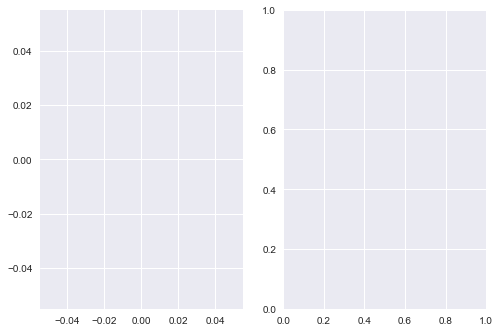

In [82]:
fig, ax = plt.subplots(1,2)
ax[0].plot()
# sns.heatmap(data=np.random.randn(0,1,[2,2]),ax=ax[1])
plt.show()

In [83]:
MCDONALDS_URL = 'http://www.mcdonalds.co.kr/www/kor/findus/district.do?sSearch_yn=Y&skey=2&pageIndex={page}&skeyword={location}'

In [86]:
import urllib.request
import json
import pandas as pd
import bs4

def search_mcdonalds_stores_one_page(location, page):
    response = urllib.request.urlopen(
        MCDONALDS_URL.format(location=urllib.parse.quote(location.encode('utf-8')), page=page))
    mcd_data = response.read().decode('utf-8')
    soup = bs4.BeautifulSoup(mcd_data)
    
    ret = []
    for storetag in soup.findAll('dl', attrs={'class': 'clearFix'}):
        storename = storetag.findAll('a')[0].contents[-1].strip()
        storeaddr = storetag.findAll('dd', attrs={'class': 'road'})[0].contents[0].split(']')[1]
        storeaddr_district = storeaddr.split()[:2]
        ret.append([storename] + storeaddr_district)

    return pd.DataFrame(ret, columns=('store', 'd1', 'd2')) if ret else None

# 여러 페이지를 쭉 찾아서 안 나올 때 까지 합친다.
def search_mcdonalds_stores(location):
    from itertools import count
    
    found = []
    for pg in count():
        foundinpage = search_mcdonalds_stores_one_page(location, pg+1)
        if foundinpage is None:
            break
        found.append(foundinpage)

    return pd.concat(found)

In [89]:
search_mcdonalds_stores('ㅇㅇ').head()

/usr/local/var/pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /usr/local/var/pyenv/versions/anaconda3-4.4.0/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


ValueError: No objects to concatenate